# Crime Analysis.
---

### Analysis
Data is present in a csv file "hate_crime.csv". important columns are "data_year, State_name, offender_race, offender_eithnicity and pug_agency_name which is the city name.
1. Crime rate has increased by 21% in California in the year 2022.
2. There is a constant increase of hate crime in California
3. Data shows crimes committed by whites are 250% more as compared to black African Americans.
4. From the data we can see that LA has the highest crime rate in California followed by San Jose.
5. Sebastopol, Rio Dell etc has the lowest crime rate.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
hate_crime_path = "Resources/hate_crime.csv"


# Read the crime data and the study results
crime_df = pd.read_csv(hate_crime_path)

#cleaning the data with conditions
state_df = crime_df[crime_df["state_name"]=="California"]
clean_df = state_df[state_df["data_year"].isin([2019,2020,2021,2022]) ]
#clean_df = state_df[state_df["data_year"]== 2022]


# Display the data table for preview
clean_df.head()

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
201550,472556,2019,CA0371100,San Diego,NaN,City,CA,California,Pacific,West,...,White,Hispanic or Latino,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
201551,472557,2019,CA0371100,San Diego,NaN,City,CA,California,Pacific,West,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,Anti-Jewish,Individual,S,S
201552,472558,2019,CA0371100,San Diego,NaN,City,CA,California,Pacific,West,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,NaN,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish,Government,S,S
201553,472560,2019,CA0371100,San Diego,NaN,City,CA,California,Pacific,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Shopping Mall,Anti-Black or African American,Individual,S,S
201554,472561,2019,CA036410X,Yucca Valley,NaN,City,CA,California,Pacific,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Residence/Home,Anti-Gay (Male),Individual,S,S


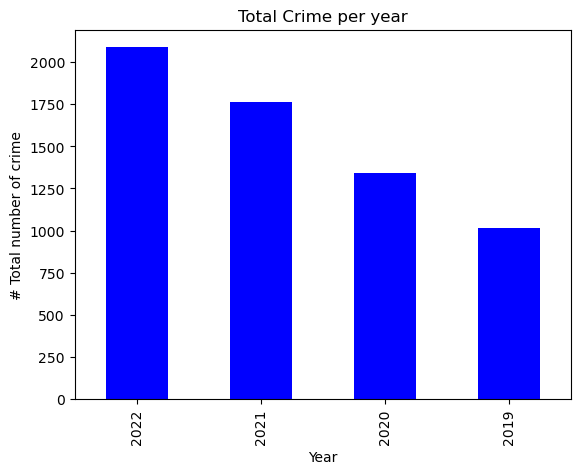

In [11]:
#Bar chart for the total number of crimes for each year
crime_count = clean_df["data_year"].value_counts()
crime_count

# Generate a bar plot showing the total number of crimes for each year using Pandas.
plot_pandas = crime_count.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Year")
plt.ylabel("# Total number of crime")
plt.title("Total Crime per year")
plt.savefig("output_data/Total_per_year.png")

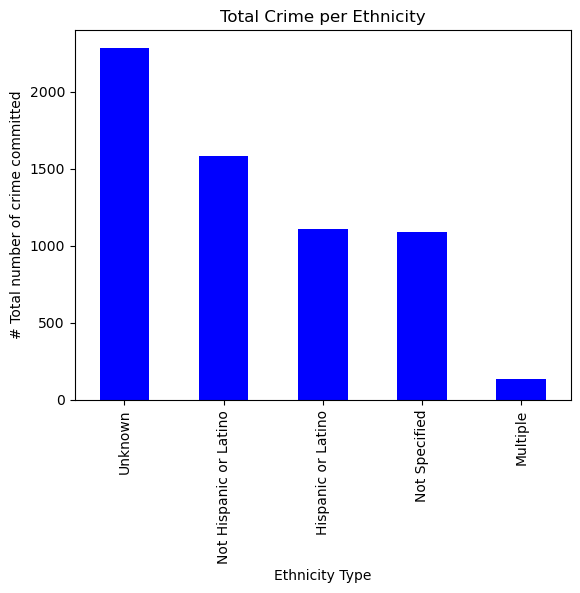

In [12]:
#Bar chart for the Ethnicity of the crimes over the 4 years
ethnicity_count = clean_df["offender_ethnicity"].value_counts()
ethnicity_count

# Generate a bar plot showing the total number of crimes for each year using Pandas.
plot_pandas = ethnicity_count.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Ethnicity Type")
plt.ylabel("# Total number of crime committed")
plt.title("Total Crime per Ethnicity")
plt.savefig("output_data/crime_Ethnicity.png")

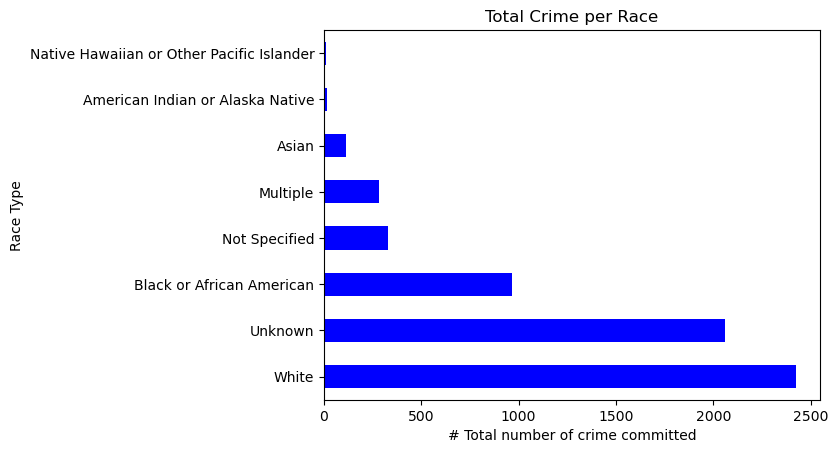

In [13]:
#Bar chart for the offenders of the crimes over the 4 years
race_count = clean_df["offender_race"].value_counts()
race_count

# Generate a bar plot showing the total number of crimes for each year using Pandas.
plot_pandas = race_count.plot.barh(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("# Total number of crime committed")
plt.ylabel("Race Type")
plt.title("Total Crime per Race")
plt.savefig("output_data/crime_race.png")

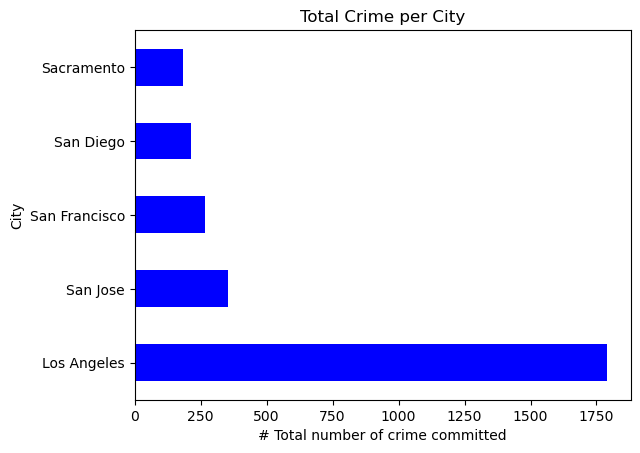

In [19]:
#Bar chart for the top 5 cities with heighest crime
city_count = clean_df["pug_agency_name"].value_counts().head(5)
city_count

# Generate a bar plot showing the total number of crimes for each year using Pandas.
plot_pandas = city_count.plot.barh(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("# Total number of crime committed")
plt.ylabel("City")
plt.title("Total Crime per City")
plt.savefig("output_data/top_5_Cities.png")

Text(0.5, 1.0, 'Total Crime per City')

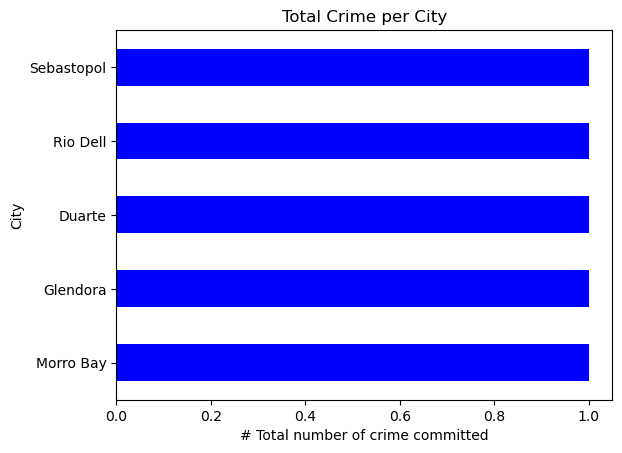

In [20]:
#Bar chart for the top 5 cities with lowest crime
city_count = clean_df["pug_agency_name"].value_counts().tail(5)
city_count

# Generate a bar plot showing the total number of crimes for each year using Pandas.
plot_pandas = city_count.plot.barh(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("# Total number of crime committed")
plt.ylabel("City")
plt.title("Total Crime per City")